In [2]:
from snewpy.neutrino import Flavor
from snewpy.models.ccsn import Fornax_2021

from astropy import units as u
from glob import glob

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

: 

: 

In [2]:
mpl.rc('font', size=16)

In [3]:
model = Fornax_2021('/junofs/users/miaoyu/supernova/models/SNEWPY_models/Fornax_2021/lum_spec_12M_r10000_dat.h5')

In [4]:
model

**Fornax_2021 Model**

|Parameter|Value|
|:--------|:----:|
|Progenitor mass | $12$ $\mathrm{M_{\odot}}$|

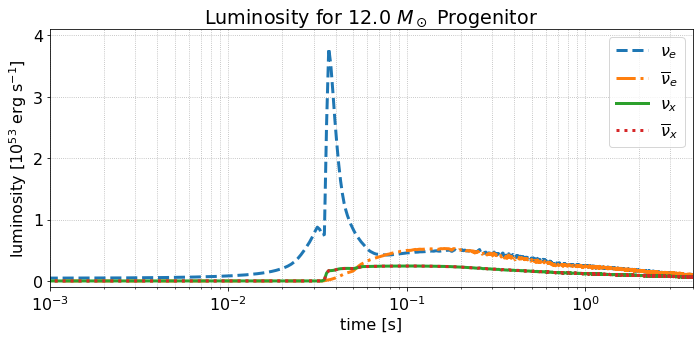

In [5]:
fig, ax = plt.subplots(1,1, figsize=(10,5), tight_layout=True)

linestyles = ['--', '-.', '-', ':']

for linestyle, flavor in zip(linestyles, Flavor):
    ax.plot(model.time, model.luminosity[flavor].to('1e53 erg/s'), lw=3, ls=linestyle, label=flavor.to_tex())

ax.set(xscale='log',
       xlim=(1e-3, 4),
       xlabel='time [s]',
       ylim=(-0.1, 4.1),
       ylabel='luminosity [$10^{53}$ erg s$^{-1}$]',
       title='Luminosity for {} $M_\odot$ Progenitor'.format(model.progenitor_mass.to_value('Msun')))
ax.grid(ls=':', which='both')
ax.legend();

In [21]:
import h5py
filename = '/junofs/users/miaoyu/supernova/models/SNEWPY_models/Fornax_2019/lum_spec_12M.h5'
snfile = h5py.File(filename, 'r')
print(snfile.keys())
group = snfile['nu0']
print(group.keys())

<KeysViewHDF5 ['nu0', 'nu1', 'nu2']>
<KeysViewHDF5 ['degroup', 'eave', 'egroup', 'erms', 'g0', 'g1', 'g10', 'g11', 'g2', 'g3', 'g4', 'g5', 'g6', 'g7', 'g8', 'g9']>


In [13]:
def energy_spectrum(model, nu, mass, t, flag=False):

    filename = '/junofs/users/miaoyu/supernova/models/SNEWPY_models/%s/lum_spec_%dM_r10000_dat.h5'%(model, mass)
    lum_file = h5py.File(filename,"r")
    #plot the angle-averaged neutrino luminosity for electron-neutrinos, summed over all bins,
    time = lum_file["nu"+str(nu)].attrs["time"]
    for i in range(len(time)-1):
        if time[i] <= t <= time[i+1]:
            tidx = i
            break
    de = np.array(lum_file["nu"+str(nu)]["degroup"])
    ce = np.array(lum_file["nu"+str(nu)]["egroup"])
    print(de[0,:])
    print(ce[0,:])
    dlum=np.zeros((4704,len(de[0])))
    for i in range(12):
        dlum[:,i]=lum_file["nu"+str(nu)]["g{}".format(i)]
    #lum0 = np.sum(dlum*de,axis=1)
    return ce[tidx, :], dlum[tidx, :]*de[tidx,:]

[  0.60804453   0.97805248   1.57321808   2.53055453   4.07045045
   6.54740556  10.53164022  16.94036586  27.2489365   43.83049022
  70.50226981 113.40439095]
[  1.26728154   2.03844913   3.27888851   5.27416146   8.48360017
  13.64605016  21.94996007  35.30697464  56.79201487  91.35115614
 146.94026521 236.35652195]


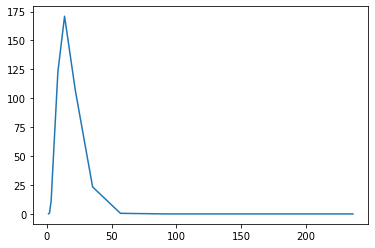

In [15]:
x, y = energy_spectrum("Fornax_2021", 0, 12, 0.2)
plt.plot(x, y)

In [1]:

import numpy as np
import h5py
import matplotlib.pyplot as plt
import math
U_MEV   = 1.60217657e-6

def generator(model, nu, mass, flag=False):

    filename = '/junofs/users/miaoyu/supernova/models/SNEWPY_models/%s/lum_spec_%dM_r10000_dat.h5'%(model, mass)
    lum_file = h5py.File(filename,"r")

    #plot the angle-averaged neutrino luminosity for electron-neutrinos, summed over all bins,
    time = lum_file["nu"+str(nu)].attrs["time"]
    de = np.array(lum_file["nu"+str(nu)]["degroup"])
    ce = np.array(lum_file["nu"+str(nu)]["egroup"])
    print(de[0,:])
    print(ce[0,:])
    dlum=np.zeros((4704,len(de[0])))
    for i in range(12):
        dlum[:,i]=lum_file["nu"+str(nu)]["g{}".format(i)]
    lum0 = np.sum(dlum*de,axis=1)
    aveE = np.sum(ce*dlum*de, axis=1) / lum0
    aveE2 = np.sum(ce**2*dlum*de, axis=1) / lum0
    
    if nu == 0:
        nutype = "ne"
    elif nu == 1:
        nutype = "na"
    elif nu == 2:
        nutype = "nx"

    with open("/junofs/users/miaoyu/supernova/models/"+model+"/mass"+str(mass)+"-"+nutype, "w") as f:
        for i, j, k, l in zip(time, lum0, aveE, aveE2):
            if math.isnan(k) or math.isnan(l):
                continue
            f.write(str(i) + " " + str(j) + " " + str(k) + " " +str(l))
            f.write("\n")
    if flag:    
        fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))
        ax1.plot(time, lum0, "-")
        ax1.set_xlim(0, 0.3)
        ax1.set_xlabel("time [s]", fontsize=14)
        ax1.set_ylabel("Luminosity", fontsize=14)
        ax2.plot(time, aveE, "-")
        ax2.set_xlim(0, 8)
        ax2.set_xlabel("time [s]", fontsize=14)
        ax2.set_ylabel("aveE [MeV]", fontsize=14)
        ax3.plot(time, aveE2, "-")
        ax3.set_xlim(0, 0.3)
        ax3.set_xlabel("time [s]", fontsize=14)
        ax3.set_ylabel("aveE2 [MeV2]", fontsize=14)
        plt.tight_layout()
        plt.show()

[  0.60804453   0.97805248   1.57321808   2.53055453   4.07045045
   6.54740556  10.53164022  16.94036586  27.2489365   43.83049022
  70.50226981 113.40439095]
[  1.26728154   2.03844913   3.27888851   5.27416146   8.48360017
  13.64605016  21.94996007  35.30697464  56.79201487  91.35115614
 146.94026521 236.35652195]


/tmp/ipykernel_12497/2876083854.py:22: RuntimeWarning: invalid value encountered in true_divide
  aveE = np.sum(ce*dlum*de, axis=1) / lum0
/tmp/ipykernel_12497/2876083854.py:23: RuntimeWarning: invalid value encountered in true_divide
  aveE2 = np.sum(ce**2*dlum*de, axis=1) / lum0


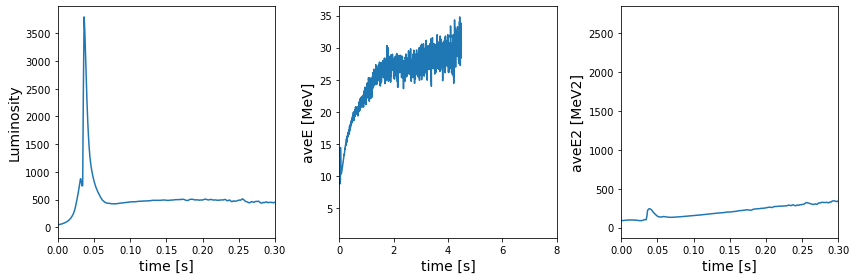

In [8]:
generator("Fornax_2021", 0, 12, True)